In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_prep_functions.ipynb"
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_analysis_functions.ipynb"
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\Inference_testing_functions.ipynb"
%run trial_history_calculations_functions.ipynb

#### <font color='darkorange'> Read the data (test runs below 15 seconds) and remove baseline trials

In [2]:
below15 = read_below15_and_remove_baseline_trials()

#### <font color='darkorange'> Calculates the error probabilities for given previous trial variable 

In [5]:

below15 = create_var_shifted_column(below15, 'latency_to_cp_entry', 1).rename(columns={
    'shifted1':'latency_to_cp_shifted1'})
below15 = create_var_shifted_column(below15, 'time_in_cp', 1).rename(columns={
    'shifted1':'time_in_cp_shifted1'})

In [6]:
below15.columns

Index(['session', 'rat', 'run_nr', 'start_timestamp', 'run_type',
       'stim_condition', 'outcome', 'group', 'cp_entry_timestamp',
       'cp_exit_timestamp', 'latency_to_cp_entry', 'latency_to_cp_exit',
       'time_in_cp', 'latency_to_cp_shifted1', 'time_in_cp_shifted1'],
      dtype='object')

In [20]:

below15= below15.dropna()
grouped = below15.groupby(['group',
                           'rat', 
                           'stim_condition',
                           'outcome'])['latency_to_cp_shifted1'].apply(np.mean)
grouped = grouped.reset_index()
grouped

,group,rat,stim_condition,outcome,latency_to_cp_shifted1
0,CTRL,CTRL2,0,0.0,2.544432
1,CTRL,CTRL2,0,1.0,3.479949
2,CTRL,CTRL2,3,0.0,2.440027
3,CTRL,CTRL2,3,1.0,3.032230
4,CTRL,CTRL3,0,0.0,3.358943
...,...,...,...,...,...
95,NPHR,NPHR9,0,1.0,4.021033
96,NPHR,NPHR9,1,0.0,4.445376
97,NPHR,NPHR9,1,1.0,4.368333
98,NPHR,NPHR9,3,0.0,4.500187


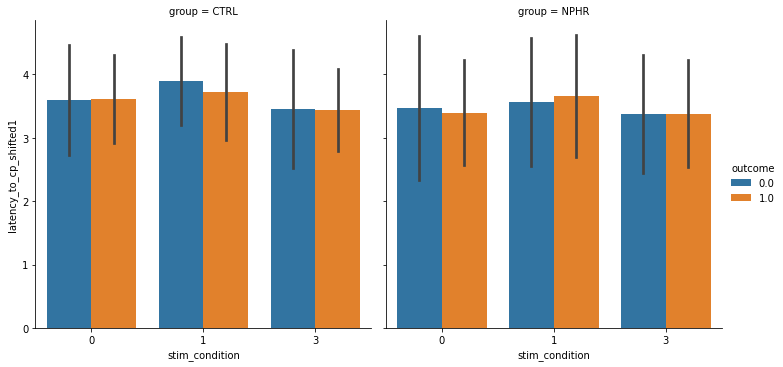

In [21]:
sns.catplot(col='group', kind='bar', data=grouped, x='stim_condition', y='latency_to_cp_shifted1',
           hue='outcome', ci='sd', estimator=np.mean)

In [22]:

below15= below15.dropna()
grouped = below15.groupby(['group',
                           'rat', 
                           'stim_condition',
                           'outcome'])['time_in_cp_shifted1'].apply(np.mean)
grouped = grouped.reset_index()
grouped

,group,rat,stim_condition,outcome,time_in_cp_shifted1
0,CTRL,CTRL2,0,0.0,0.737554
1,CTRL,CTRL2,0,1.0,0.727154
2,CTRL,CTRL2,3,0.0,0.995238
3,CTRL,CTRL2,3,1.0,0.879427
4,CTRL,CTRL3,0,0.0,0.922175
...,...,...,...,...,...
95,NPHR,NPHR9,0,1.0,1.144270
96,NPHR,NPHR9,1,0.0,0.932060
97,NPHR,NPHR9,1,1.0,1.222419
98,NPHR,NPHR9,3,0.0,0.976372


<AxesSubplot:xlabel='stim_condition', ylabel='time_in_cp_shifted1'>

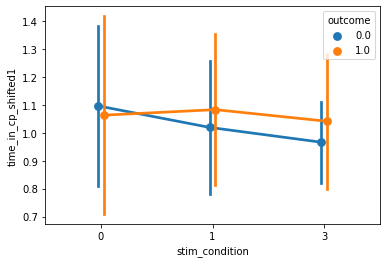

In [26]:
sns.pointplot(col='group', kind='bar', data=grouped, x='stim_condition', y='time_in_cp_shifted1',
           hue='outcome', ci='sd', estimator=np.mean, dodge=True)